<a href="https://colab.research.google.com/github/yashsolanki162003/Transfer-Learning-in-Deep-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import PIL.Image as Image
import os
import tensorflow_hub as hub

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

class HubLayerWrapper(tf.keras.layers.Layer):
    def __init__(self, hub_url, **kwargs):
        super().__init__(**kwargs)
        self.hub_layer = hub.KerasLayer(hub_url, **kwargs)

    def call(self, inputs):
        return self.hub_layer(inputs)

mobilenet_layer_wrapped = HubLayerWrapper(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
    input_shape=IMAGE_SHAPE+(3,)
)

print(f"Is mobilenet_layer_wrapped an instance of tf.keras.layers.Layer? {isinstance(mobilenet_layer_wrapped, tf.keras.layers.Layer)}")

classifier = tf.keras.Sequential([
    mobilenet_layer_wrapped
])
# IMAGE_SHAPE = (224, 224)

# classifier = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
# ])

/tmp/ipython-input-2865427727.py:5: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Is mobilenet_layer_wrapped an instance of tf.keras.layers.Layer? True


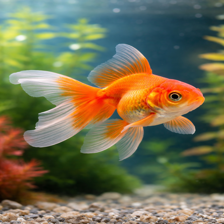

In [ ]:
gold_fish = Image.open("goldfish.png").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...]

array([[[[0.65098039, 0.77254902, 0.77254902],
         [0.67058824, 0.78823529, 0.77647059],
         [0.68627451, 0.8       , 0.78823529],
         ...,
         [0.41960784, 0.44313725, 0.3372549 ],
         [0.43137255, 0.45098039, 0.3372549 ],
         [0.43529412, 0.45098039, 0.3372549 ]],

        [[0.61960784, 0.75294118, 0.74901961],
         [0.63921569, 0.76862745, 0.75686275],
         [0.65882353, 0.78431373, 0.76862745],
         ...,
         [0.41568627, 0.43921569, 0.33333333],
         [0.43137255, 0.45098039, 0.34509804],
         [0.44313725, 0.45882353, 0.34901961]],

        [[0.59607843, 0.7372549 , 0.74117647],
         [0.60784314, 0.74901961, 0.74509804],
         [0.61960784, 0.76470588, 0.74117647],
         ...,
         [0.39215686, 0.43137255, 0.34117647],
         [0.4       , 0.43137255, 0.33333333],
         [0.40784314, 0.43137255, 0.3372549 ]],

        ...,

        [[0.36862745, 0.35294118, 0.35294118],
         [0.4627451 , 0.45882353, 0.4745098 ]

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

np.int64(2)

In [ ]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

'/root/.keras/datasets/ImageNetLabels.txt'

In [ ]:
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
print(image_labels[predicted_label_index])

goldfish


# Load flowers dataset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir=data_dir + "/flower_photos"

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/537625768_791e973b40.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8674140377_ae7b0be523.jpg')]

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/537625768_791e973b40.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8674140377_ae7b0be523.jpg')]

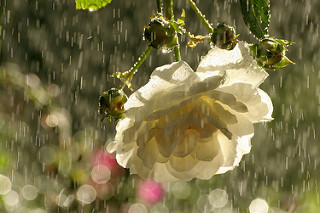

In [ ]:
Image.open(roses[1])

In [ ]:
flower_image_dic={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [ ]:
flower_labels_image={
    'roses':0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4
}

In [ ]:
str(flower_image_dic['roses'][0])

'datasets/flower_photos/flower_photos/roses/9300754115_dd79670066_n.jpg'

array([[[221, 227, 226],
        [240, 245, 244],
        [252, 254, 254],
        ...,
        [250, 250, 250],
        [254, 252, 252],
        [255, 253, 253]],

       [[239, 245, 244],
        [250, 255, 254],
        [253, 255, 255],
        ...,
        [250, 250, 250],
        [254, 252, 252],
        [255, 253, 253]],

       [[247, 253, 252],
        [251, 255, 255],
        [251, 253, 253],
        ...,
        [251, 251, 251],
        [254, 252, 252],
        [255, 253, 253]],

       ...,

       [[207, 204, 199],
        [171, 168, 163],
        [170, 167, 162],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[173, 181, 180],
        [ 92, 104, 104],
        [ 78,  91,  93],
        ...,
        [192, 194, 182],
        [200, 198, 187],
        [210, 203, 194]],

       [[216, 241, 243],
        [151, 178, 182],
        [136, 167, 170],
        ...,
        [ 67,  70,  55],
        [ 78,  76,  65],
        [ 91,  84,  75]]], dtype=uint8)
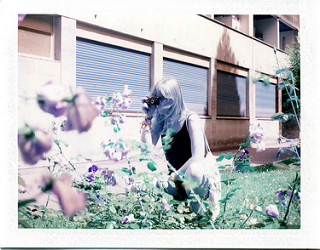

In [ ]:
img=cv2.imread(str(flower_image_dic['roses'][0]))
img

array([[[226, 232, 231],
        [248, 251, 251],
        [252, 252, 252],
        ...,
        [249, 249, 249],
        [251, 251, 251],
        [255, 253, 253]],

       [[242, 248, 247],
        [252, 255, 254],
        [253, 253, 253],
        ...,
        [250, 250, 250],
        [251, 251, 251],
        [255, 253, 253]],

       [[247, 253, 252],
        [250, 253, 253],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [252, 251, 251],
        [255, 253, 253]],

       ...,

       [[215, 213, 208],
        [194, 191, 187],
        [195, 193, 189],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[163, 170, 168],
        [ 98, 108, 108],
        [ 86, 101, 101],
        ...,
        [200, 199, 191],
        [205, 206, 196],
        [216, 211, 203]],

       [[199, 224, 226],
        [138, 166, 170],
        [120, 155, 158],
        ...,
        [ 65,  66,  55],
        [ 78,  79,  66],
        [ 95,  89,  80]]], dtype=uint8)
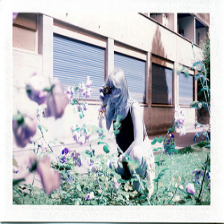

In [ ]:
img=cv2.resize(img,IMAGE_SHAPE)
img

In [ ]:
X = []
y = []

for flower_name, images in flower_image_dic.items():
    for image in images:
        img = cv2.imread(str(image))

        if img is None:     # 🔥 key fix
            print("Skipping:", image)
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(img, (224, 224))

        X.append(resized_img)
        y.append(flower_labels_image[flower_name])

Skipping: datasets/flower_photos/flower_photos/daisy/.ipynb_checkpoints


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Now take pre-trained model and retrain it using flowers images

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Use the HubLayerWrapper to encapsulate the hub.KerasLayer
pretrained_model_without_top_layer = HubLayerWrapper(
    feature_extractor_model,
    input_shape=IMAGE_SHAPE+(3,), # Explicitly set input_shape here
    trainable=False
)

/tmp/ipython-input-2865427727.py:5: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hub_layer_wrapper_3             │ (None, 1280)           │             0 │
│ (HubLayerWrapper)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

### Building the Model with Keras Functional API

The Keras Functional API allows you to define complex models by connecting layers in a non-sequential manner. This is particularly useful when combining layers from different sources or creating models with multiple inputs/outputs.

In [ ]:
input_shape = (224, 224, 3)
inputs = tf.keras.Input(shape=input_shape)
x = pretrained_model_without_top_layer(inputs)
outputs = tf.keras.layers.Dense(num_of_flowers)(x)

model_functional = tf.keras.Model(inputs=inputs, outputs=outputs)
model_functional.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hub_layer_wrapper_3             │ (None, 1280)           │             0 │
│ (HubLayerWrapper)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - acc: 0.5734 - loss: 1.1329
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.8721 - loss: 0.3835
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 0.8989 - loss: 0.3084
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9297 - loss: 0.2423
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.9444 - loss: 0.2098


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 366ms/step - acc: 0.8839 - loss: 0.3300


[0.30926111340522766, 0.899782121181488]